In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
# 실습데이터 형성
X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

In [ ]:
labels = range(1, 11)

plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.2)
plt.scatter(X[:, 0], X[:, 1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
	plt.annotate(
		label,
		xy = (x, y),
		xytext = (-3, 3),
		textcoords="offset points",
		ha='right',
		va='bottom'
		)
plt.show()

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X, 'single')

### scipy.cluster.hierarchy.dendrogram
> scipy.cluster.hierarchy.dendrogram(Z, p=30, truncate_mode=None, color_threshold=None, get_leaves=True, orientation='top', labels=None, count_sort=False, distance_sort=False, show_leaf_counts=True, no_plot=False, no_labels=False, leaf_font_size=None, leaf_rotation=None, leaf_label_func=None, show_contracted=False, link_color_func=None, ax=None, above_threshold_color='C0')

In [ ]:
labelList = range(1, 11)

plt.figure(figsize=(10, 7))

dendrogram(
	linked,
	orientation='top',
	distance_sort='descending',
	
)

plt.show()

### 쇼핑 데이터 군집 분석

In [ ]:
df = pd.read_csv('./datasets/shopping-data.csv')
df.head()

In [ ]:
df.info()

In [ ]:
data = df.iloc[:, 3:5]
data

In [ ]:
linked = linkage(data, 'ward')
plt.figure(figsize=(10, 7))

dendrogram(
	linked,
	orientation='top',
	distance_sort='descending',
	show_leaf_counts=True
)

plt.show()

### sklearn.cluster.AgglomerativeClustering
> class sklearn.cluster.AgglomerativeClustering(n_clusters=2, *, affinity='deprecated', metric=None, memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None, compute_distances=False)

In [25]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6)
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 5, 0, 5, 0,
       1, 0, 5, 0, 5, 0, 5, 0, 5, 0, 1, 0, 5, 0, 1, 0, 5, 0, 5, 0, 5, 0,
       5, 0, 5, 0, 5, 0, 1, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0,
       5, 0, 5, 0, 2, 0, 5, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [26]:
cluster.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 5, 0, 5, 0,
       1, 0, 5, 0, 5, 0, 5, 0, 5, 0, 1, 0, 5, 0, 1, 0, 5, 0, 5, 0, 5, 0,
       5, 0, 5, 0, 5, 0, 1, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0,
       5, 0, 5, 0, 2, 0, 5, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

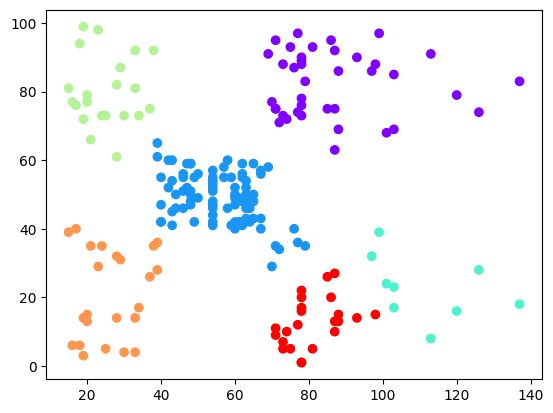

In [29]:
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=cluster.labels_, cmap='rainbow')